In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
data = np.array ([[40,20],[55,30],[70,60],[50,35],[45,40],[62,75],[45,30],[45,30],[68,80],[80,70],[75,90]])

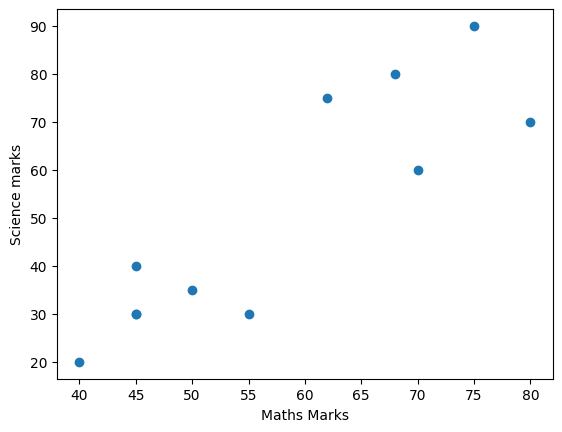

In [3]:
plt.scatter(data[:,0],data[:,1])
plt.xlabel("Maths Marks")
plt.ylabel("Science marks")
plt.show()

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
print(scaled_data)

[[-1.33618072 -1.31895939]
 [-0.20556626 -0.89223724]
 [ 0.92504819  0.38792923]
 [-0.58243775 -0.67887616]
 [-0.95930923 -0.46551508]
 [ 0.32205381  1.02801247]
 [-0.95930923 -0.89223724]
 [-0.95930923 -0.89223724]
 [ 0.7742996   1.24137354]
 [ 1.67879116  0.81465139]
 [ 1.30191967  1.6680957 ]]


In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
pred=pca.fit_transform(scaled_data)
pred

array([[-1.87746758],
       [-0.7762643 ],
       [ 0.92841524],
       [-0.89188362],
       [-1.00750293],
       [ 0.95464102],
       [-1.30924106],
       [-1.30924106],
       [ 1.42529615],
       [ 1.76313013],
       [ 2.10011801]])

In [12]:
pca.explained_variance_

array([2.06901006])

In [13]:
pca.explained_variance_ratio_

array([0.94045912])

In [14]:
pca_scaled_data = pca.transform(scaled_data)

In [15]:
scaled_data.shape

(11, 2)

In [16]:
pca_scaled_data.shape

(11, 1)

In [17]:
pca_scaled_data=pca.inverse_transform(pca_scaled_data)

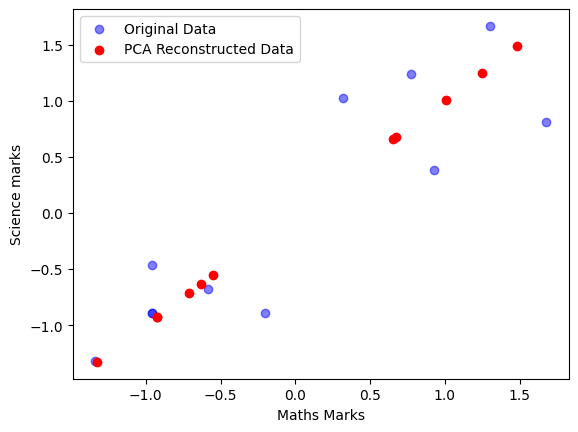

In [19]:
plt.scatter(scaled_data[:,0],scaled_data[:,1],color='blue',label='Original Data', alpha=0.5)
plt.scatter(pca_scaled_data[:,0],pca_scaled_data[:,1],color='red',label='PCA Reconstructed Data')
plt.xlabel("Maths Marks")
plt.ylabel("Science marks")
plt.legend()
plt.show()

# PCA for Vizualization

In [20]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [21]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]], shape=(1797, 64))

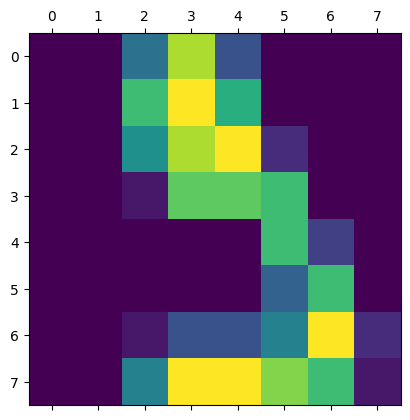

In [34]:
plt.matshow(digits.images[19])
plt.show()

In [35]:
digits.target[19]

np.int64(9)

In [42]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
new_digits = pca.fit_transform(digits.data)
new_digits.shape

(1797, 2)

In [43]:
new_digits.data

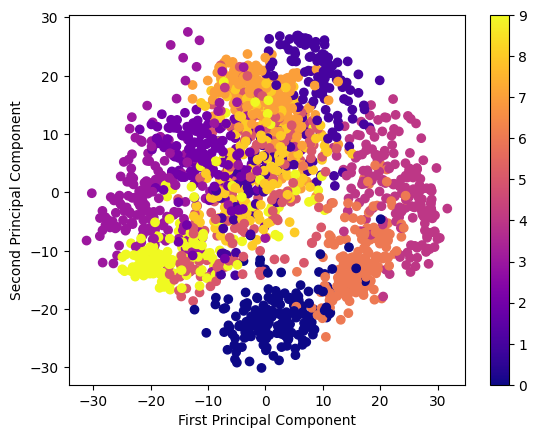

In [45]:
plt.scatter(new_digits[:,0],new_digits[:,1],c=digits.target,cmap='plasma')
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.colorbar()

# PCA for speedup models

In [74]:
from sklearn.datasets import load_digits
import numpy as np
digits = load_digits()
digits.data.shape

(1797, 64)

In [75]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(digits.data)
scaled_data.shape

(1797, 64)

In [76]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scaled_data, digits.target, test_size=0.2 , random_state=42)
x_train.shape, x_test.shape

((1437, 64), (360, 64))

In [77]:
y_train.shape, y_test.shape

((1437,), (360,))

In [78]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs',max_iter=1000)

import time
start = time.time()
model.fit(x_train,y_train)
end = time.time()
print("Time taken to train the model without PCA: ", (end - start)*1000, "ms")

Time taken to train the model without PCA:  15.464305877685547 ms


In [79]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy without PCA: ", accuracy*100, "%")

Accuracy without PCA:  97.22222222222221 %


## Model Training with PCA


In [80]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca_digits = pca.fit_transform(scaled_data)
pca_digits.shape

(1797, 10)

In [81]:
from sklearn.model_selection import train_test_split
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(pca_digits, digits.target, test_size=0.2, random_state=42)
X_train_pca.shape, X_test_pca.shape

((1437, 10), (360, 10))

In [82]:
y_train_pca.shape, y_test_pca.shape

((1437,), (360,))

In [83]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs',max_iter=1000)

import time
start_pca = time.time()     
model.fit(X_train_pca, y_train_pca)
end_pca = time.time()
print("Time taken to train the model with PCA: ", (end_pca - start_pca)*1000, "ms")


Time taken to train the model with PCA:  21.4540958404541 ms


In [84]:
from sklearn.metrics import accuracy_score
y_pred_pca = model.predict(X_test_pca)
accuracy = accuracy_score(y_test_pca,y_pred_pca)
print("Accuracy with PCA: ", accuracy*100, "%")

Accuracy with PCA:  89.72222222222223 %
